In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy
from sympy import *    
from sympy.plotting import plot_parametric

# SVD

## 1)  Compute the Singular Value decomposition U, S, V by following these steps:

In [10]:
A = np.array([[-4, 1], [-3, 2], [7, -4], [-4, -9], [7, 6], [-3, 9], [-8, 7], [2, 3], [9, -9], [8, 7], [-4, -4], 
              [-7, -7], [7, 9], [-2, 4], [-5, -5], [5, -4], [7, -9], [-2, 6], [-1, 3], [1, 6]])
print(A)
print(A.shape)

[[-4  1]
 [-3  2]
 [ 7 -4]
 [-4 -9]
 [ 7  6]
 [-3  9]
 [-8  7]
 [ 2  3]
 [ 9 -9]
 [ 8  7]
 [-4 -4]
 [-7 -7]
 [ 7  9]
 [-2  4]
 [-5 -5]
 [ 5 -4]
 [ 7 -9]
 [-2  6]
 [-1  3]
 [ 1  6]]
(20, 2)


### 1a)  Calculate A dot A-transpose and A-transpose dot A.  What are their dimensions?

In [7]:
ata = A.T.dot(A)
aat = A.dot(A.T)
print('Dimensions for A dot A-Transpose are: {}'.format(aat.shape))
print('Dimensions for A-Transpose dot A are: {}'.format(ata.shape))

Dimensions for A dot A-Transpose are: (20, 20)
Dimensions for A-Transpose dot A are: (2, 2)


ie

$A \cdot A^T$ is of dimension $20x20$

$A^T \cdot A$ is of dimension $2x2$

### 1b)  Calculate the eigenvalues of A dot A-transpose and of A-transpose dot A.  If you were doing this by hand, which matrix would you prefer to calculate the eigenvalues?   Use these eigenvalues to make the matrix S in the SVD for A.

If I were doing this by hand, I would prefer to use the $A^T \cdot A$ matrix as it will only have 2 eigenvalues we would need to derive. Hence we will be using the eigenvalues of $A^T \cdot A$ to make matrix S

In [11]:
evals, evecs = np.linalg.eig(ata)
print(evals)

[583.57013184 772.42986816]


Using these two eigenvalues, and the fact that we know that shape of **Σ** will be $20x2$ we can make the following **Σ** matrix

In [14]:
sigma = np.array([[np.sqrt(evals[0]), 0], [0,np.sqrt(evals[1])], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0],[0,0],[0,0],[0,0],[0,0]])
print(sigma.shape)
print(sigma)

(20, 2)
[[24.15719627  0.        ]
 [ 0.         27.79262255]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]
 [ 0.          0.        ]]


### 1c)  Calculate the symbolic eigenvalues of A dot A-transpose, in this case, in the form a + Sqrt[b] where a and b are integers  (if your software is not symbolic, calculate det(M - x*I) and use the quadratic formula).  Let An = numerical version of A  (in Mathematica N[A] ) and calculate the eigenvalues of An dot An-transpose.  Compare the numerical with the symbolic.

Unsure how to do this, sorry =(

### 1d)  Calculate the eigenvectors of A-transpose dot A, normalize to unit length if necessary, and call them v1 and v2.  Use v1 and v2 to make the matrix V of the SVD of A.  

In [43]:
v2 = evecs[:,0]
v1 = evecs[:,1]
print('v1 is {}'.format(v1))
print(np.linalg.norm(v1))
print('v2 is {}'.format(v2))
print(np.linalg.norm(v2))

v1 is [ 0.04770874 -0.99886129]
1.0
v2 is [-0.99886129 -0.04770874]
1.0


Since the dimensions of the **v1** and **v2** are $2x1$, we can then readily craft V to be:

In [44]:
V = np.array([v1,v2]).T
print(V)

[[ 0.04770874 -0.99886129]
 [-0.99886129 -0.04770874]]


### 1e)  Calculate u1 = A dot v1 and u2 = A dot v2.  Verify that u1 and u2 are eigenvectors of A dot A-transpose.  Verify that u1 is perpendicular to u2.  What do you have to do to these vectors before making the first two columns of U of the SVD of A?  In order to complete the columns of U, describe in words what you would do if you were doing it by hand.

In [25]:
u1 = A.dot(v1)
u2 = A.dot(v2)
print('u1: {}'.format(u1))
print('------------------------------------------------')
print('u2: {}'.format(u2))
print('------------------------------------------------')
print('Verification that u1 & u2 are perpendicular: u1 dot u2 = {}'.format(u1.dot(u2)))

u1: [ 3.94773642  2.90116639 -6.80119407  4.42482382 -7.27828147  2.56720521
  7.65692914 -2.1408488  -8.56037295 -8.3248515   4.18628012  7.32599021
 -7.42140769  1.80688762  5.23285015 -4.80347149 -6.56265037  1.71147014
  0.85573507 -1.28511373]
------------------------------------------------
u2: [-1.18969625 -2.1408488   4.32940634  8.79891665 -5.65920656 -9.13287783
 -7.37369895 -2.90116639  9.41913027 -6.61035911  3.8046102   6.65806785
 -8.65579043 -4.09086264  4.75576275  4.23398886  9.32371279 -6.08858522
 -3.04429261 -5.945459  ]
------------------------------------------------
Verification that u1 & u2 are perpendicular: u1 dot u2 = 2.042810365310288e-14


Given that computer systems are not always numerically stable, we can consider such a small number of $2 * 10^{-14}$ to be effectively equal to $0$. Hence we have **proven** that u1 and u2 are **perpendicular**

We know that u1 and u2 are eigenvectors of $A \cdot A^T$ by the proof that the eigenpairs of $A^T \cdot A$ can be transformed to produce the eigenpairs of $A \cdot A^T$. This can be further verified by computing $\frac{1}{\sigma} * A*v$

Prior to using these vectors to make the first two coluns of U, we need to **normalize** them. 

**IF I WERE DOING THIS VIA HAND**

I would first approximate the square root of the eigenvalues above. This is because we know that 

$A \cdot v = \sigma * u$ and

$\lambda_i = \sigma_i^2$

where u and v are unit normal vectors and $\sigma$ is our singular value. Thereby, to normalize the above vectors u1 and u2, we can simply divide by $\sigma$ as that is the multiple that is causing u1 and u2 not to be normalized. Hence, by approximating $\sigma$ we can divide the u1 and u2 above by the approximated $\sigma$ to generate their unit norm form.

#### Constructing U

In [29]:
u1 = u1 / np.linalg.norm(u1)
u2 = u2 / np.linalg.norm(u2)

U = np.array([u1, u2, np.zeros(20), np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20),np.zeros(20)]).T
print(U)
print(U.shape)

[[ 0.16341865 -0.04280619  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.12009533 -0.07702939  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.28153905  0.15577538  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.18316794  0.31659181  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [-0.30128834 -0.20362262  0.          0.          0.          0.
   0.          0.          0.     

## 2)  What is the list of singular values of A using the eigenvalues in (1b)?  

In [39]:
singval2 = np.sqrt(evals[0])
singval1 = np.sqrt(evals[1])

print('Singular Value 1: {}'.format(singval1))
print("Singular Value 2: {}".format(singval2))

Singular Value 1: 27.79262254909051
Singular Value 2: 24.157196274480732


## 3)  Show the eigenvectors v1,v2 from (1d) in the plane.  

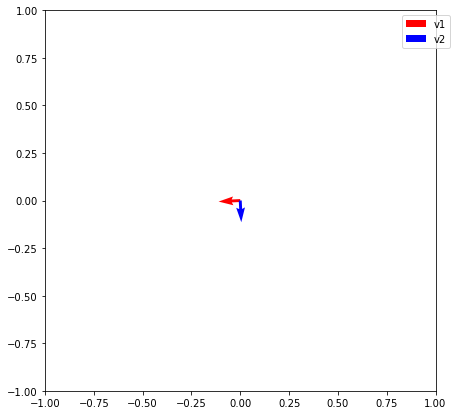

In [37]:
plt.figure(figsize=(7,7))
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.quiver(v1[0], v1[1],color='red',label='v1')
plt.quiver(v2[0],v2[1],color='blue',label='v2')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

## 4)  Compute the quadratic form Q(v)=(A dot v) dot (A dot v) and plot the parametric curve r = Q(v) where v= {Cos[t], Sin[t]} is on the unit circle. TODO

## 5)  What is the maximum length of A dot v for unit vectors v?  That is stretching.   

In [40]:
print(singval1)

27.79262254909051


The maximum length of $A \cdot v$, for all unit vectors v, is the largest singular value of A. Its corresponding $v_1$ is the direction in which the stretching is the largest.

## 6) What is the minimum length of A dot v for unit vectors v?  That is squeezing. 

In [41]:
print(singval2)

24.157196274480732


The minimum length of $A \cdot v$, for all unit vectors v, is the smallest singular value of A. Its corresponding $v_2$ is the direciton in which the stretching is the smallest, hence it is squeezing.

# Dimension Reduction

## 7)

### a) Given the matrix B below, use SVD to approximate it with a rank 2 matrix  and call it Bnew.

In [45]:
B = np.array([[0.23, 0.6, 0.74, 0.72, 0.04, 0.91, 0.3, 0.43, 0.65, 0.19], [0.78, 0.13, 0.63, 0.15, 0.08, 0.17, 0.25, 0.22, 0.72, 0.51], [0.5, 0.67, 0.18, 0.79, 0.36, 0.55, 0.6, 0.72, 0.14, 0.84], [0.39, 0.61, 0.43, 0.36, 0.99, 0.67, 0.3, 0.61, 0.93, 0.5], [0.7, 0.94, 0.65, 0.63, 0.97, 0.3, 0.17, 0.86, 0.76, 0.76], [0.24, 0.03, 0.46, 0.5, 0.51, 0.33, 0.86, 0.29, 0.57, 0.75], [0.51, 0.31, 0.86, 0.08, 0.27, 0.11, 0.22, 0.9, 0.68, 0.05], [0.21, 0.83, 0.17, 0.61, 0.29, 0.26, 0.77, 0.45, 0.81, 0.95], [0.1, 0.37, 0.16, 0.97, 0.49, 0.79, 0.82, 0.34, 0.26, 0.38], [0.72, 0.76, 0.22, 0.38, 0.27, 0.43, 0.36, 0.39, 0.19, 0.76]])
B.shape

(10, 10)

In [47]:
u, s, v = np.linalg.svd(B, full_matrices=False)
Bnew = np.zeros((len(u), len(v)))
for i in range(2):
    Bnew += s[i] * np.outer(u.T[i], v[i])
print(Bnew)

[[ 0.41264985  0.52776526  0.41973051  0.49857305  0.43960698  0.42656182
   0.42551425  0.50989495  0.5502858   0.55093132]
 [ 0.46581807  0.37611952  0.54986738  0.15771735  0.36298145  0.19051408
   0.10632383  0.50293888  0.59679677  0.29409875]
 [ 0.31147476  0.61606342  0.24143769  0.77783228  0.46390733  0.61040275
   0.6918834   0.45688636  0.43953931  0.74076165]
 [ 0.57862301  0.6300898   0.62662357  0.49632497  0.54971237  0.45245873
   0.40943816  0.67861256  0.75940836  0.60842541]
 [ 0.71194428  0.73473057  0.78504207  0.53591745  0.65177585  0.5030003
   0.43474697  0.82156318  0.92988287  0.68810973]
 [ 0.30825536  0.50871124  0.27390988  0.58354613  0.39784148  0.47029951
   0.51277433  0.4187606   0.42378219  0.58238755]
 [ 0.60032719  0.398093    0.73864517  0.04347928  0.41523144  0.13074509
  -0.01049634  0.6195103   0.75950666  0.24972216]
 [ 0.36528054  0.62885407  0.31556642  0.73951414  0.48723564  0.591795
   0.65196628  0.50484019  0.50507014  0.72898159]
 [ 

### b) Calculate the rank of Bnew

In [48]:
print(np.linalg.matrix_rank(Bnew))

2


### c) Calculate the singular values of the difference B - Bnew and compare to the singular values of B.

In [49]:
unew, snew, vnew = np.linalg.svd(B - Bnew)
print("B's Singular Values: {}".format(s))
print('---------------------------------------------------------------')
print("B-Bnew's Singular Values: {}".format(snew))

B's Singular Values: [5.04282981 1.5072937  1.08938674 0.96787892 0.89255825 0.65286199
 0.59124593 0.32225928 0.19364291 0.15959561]
---------------------------------------------------------------
B-Bnew's Singular Values: [1.08938674e+00 9.67878921e-01 8.92558247e-01 6.52861986e-01
 5.91245933e-01 3.22259285e-01 1.93642907e-01 1.59595612e-01
 3.06966341e-14 7.78374345e-16]


The singular values of B and B - Bnew are very close, with only the largest 2 singluar values missing in the list of singular values of B - Bnew. This makes sense as we approximated Bnew with rank 2, hence Bnew generated the 2 largest singular values which are missing here because we subtract Bnew from B. This thereby causes B-Bnew to have correctly approximated 8 out of 10 of the singular values of B.

## 8)  Clustering.  Below, P is a list of data points in 20 dimensions.  Project them to 2D using dimension reduction with SVD (the eigenvectors of U) and make a picture.  By hand, separate them into two lists by giving two lists of indices.  Make another picture with the two sets of points in different colors.  It is ok to have an outlier or two.

In [50]:
P = np.array([[0.08, 0.23, 0.43, 0.14, 0.12, 0.04, 0.3, 0.13, 0.02, 0.], [0.58, 0.28, 0., 0., 0.23, 0., 0., 0., 0., 0.], [0.38, 0.47, 0.27, 0.65, 0.06, 0.09, 0.17, 0.13, 0.07, 0.19], [0.13, 0.16, 0.14, 0.13, 0.35, 0.09, 0.13, 0.29, 0.02, 0.], [0.22, 0.18, 0.04, 0.07, 0.35, 0., 0.08, 0.79, 0., 0.02], [0.13, 0.36, 0., 0., 0., 0., 0.08, 0.18, 0., 0.], [0.15, 0.4, 0., 0., 0., 0., 0.17, 0.31, 0., 0.], [0.16, 0.22, 0.78, 0.07, 0.12, 0., 0.08, 0., 0., 0.], [0.08, 0.42, 0.17, 0.72, 0., 0.09, 0.17, 0.13, 0., 0.]])
P.shape

(9, 10)

In [58]:
u,s,v = np.linalg.svd(P, full_matrices=False)


pts = u.dot(s)
pts.shape

(9,)

## 9

SORRY I WAS NOT ABLE TO DO 8 & 9 :(